<h1 style="text-align: center;">
Basic Data Analysis & Machine Learning Techniques
</h1>
<p style="text-align: center;">
A few basic machine learning techniques: with data analysis and visualization methods
</p>

## Importing all the libraries

This step is important to import all the libraries required for our project. Some of them are in-built while some need to be installed from third-party websites. In case of any error in this step, go through the official documentation to understand how the installation works for your system.

In [1]:
from statistics import mean
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

## Loading the Dataset

This step is important to load the data from the .xls, .csv files into our algorithm.

In [2]:
#There are so many ways to load the dataset and this is one method that works easily
#Note that the command varies for .xls and .csv files
#Clean (remove/add certain rows or columns or data) your data based on what you require form the input file

df = pd.read_excel("defaultpay.xls", index_col=0, skiprows=1)
#Removed the first row since it is not required
#Assigned the first column to be our index column since we already have index in our input file
#Do refer the actual input .xls file to see the changes we made

df                                                       #Outputs the data after cleaning

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


## Exploratory Data Analysis

This step is important to show the basic info related to the data. There are different ways to explore data based on our requirement. Below are a few of them.

In [3]:
df.head()                                                #Outputs the first 5 rows of our data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.tail()                                                 #Outputs the last 5 rows of our data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,50000,1,2,1,46,0,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [5]:
df.info()                                                 #Outputs some info of our data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [6]:
df.columns                                                #Outputs all the columns in our data

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

## Data Wrangling and Data Visualization

This step is important to verify our data and fill in any missing values (that is Data Wrangling). Data Visualization is visual representation of our data to make our data easy to interpret. 

In [7]:
df.isnull().sum()                                               #Check for missing data values

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [8]:
df.nunique()                                               #Returns the number of Distinctive Observations

LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [9]:
df['SEX'].unique()                                        #Checking the Unique Values in one Column

array([2, 1], dtype=int64)

In [10]:
df.dtypes                                                 #Checking the Data Types of Values of each Column

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [11]:
df.groupby('SEX').LIMIT_BAL.describe()                    #Grouping Customers by each value (male and female here)

,count,mean,std,min,25%,50%,75%,max
SEX,,,,,,,,
1,11888.0,163519.825034,136250.481355,10000.0,50000.0,130000.0,240000.0,800000.0
2,18112.0,170086.462014,125231.777960,10000.0,70000.0,150000.0,240000.0,1000000.0


In [12]:
df.describe()                                            #Some statistical info of our data in each column 

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


<AxesSubplot:xlabel='SEX', ylabel='Count'>

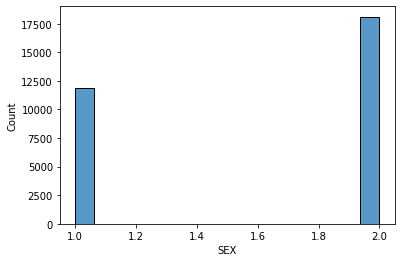

In [13]:
hist = df.drop(df.index[0])                              #Histogram of our data (drop the index column)
sns.histplot(hist['SEX'])                                #Histogram of the sex count in this case

<AxesSubplot:xlabel='MARRIAGE', ylabel='Count'>

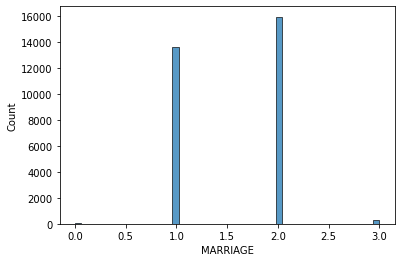

In [14]:
hist = df.drop(df.index[0])
sns.histplot(hist['MARRIAGE'])                          #Histogram of the marriage count in this case

<AxesSubplot:xlabel='default payment next month', ylabel='count'>

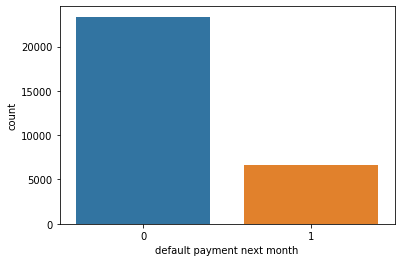

In [15]:
sns.countplot(x='default payment next month', data=df)  #Histogram of the 'default payment next month' count in this case
#This is a much way better way than the previous method

<AxesSubplot:ylabel='SEX'>

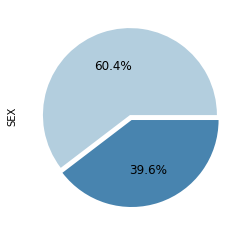

In [16]:
df['SEX'].value_counts().plot(kind='pie', labels=['',''], 
                                        autopct='%1.1f%%', colors=['#B3CEDE','#4884AF'], 
                                        explode=[0,0.06], textprops={"fontsize":12})  #Pie Chart of 'sex' count

## Logistic Regression

In [17]:
#'Features' contains the columns that this algorithm will take in and ignore the other columns in our data
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']


x = df[features]                                        #X is the input values that we will put in our algorithm 
y = df['default payment next month']                    #Y is the output value that we have in our data

#Training and Test Split is a step to split our data for training and testing
#Our goal is to make our trained data as similar as possible to our test data
#The more accurate it is, the better your algorithm is
#Split can be any ratio but generally it 80:20 or 70:30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, train_size= 0.7)

lr = LogisticRegression()                               #Loading the Logistic Regression Function
lr.fit(x_train, y_train)                                #Fitting our trained data with the ML Algorithm
y_pred = lr.predict(x_test)                             #Predicting the test data with our trained data

#There are different ways to find accuracy
#RMS gives the value of how different the tested and trained datasets are
#To find how similar they are, we calculate '1-rms' value
#Root Mean Square method (RMS) is a better measure of accuaracy for Regression Algorithms
rms1 = mean_squared_error(y_test , y_pred)              #Comparing the trained data and test data using RMS values
mla1 = 1 - rms1                                         #Calculating the Accuracy (of how similar they are)

#Printing our Accuracy
print("Root Mean Square Error value for Logistic Regression Model is:", rms1)
print("Accuracy for Logistic Regression Model is:", mla1)

Root Mean Square Error value for Logistic Regression Model is: 0.22188888888888889
Accuracy for Logistic Regression Model is: 0.7781111111111111


## Lasso

In [18]:
#'Features' contains the columns that this algorithm will take in and ignore the other columns in our data
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']


x = df[features]                                        #X is the input values that we will put in our algorithm 
y = df['default payment next month']                    #Y is the output value that we have in our data

#Training and Test Split is a step to split our data for training and testing
#Our goal is to make our trained data as similar as possible to our test data
#The more accurate it is, the better your algorithm is
#Split can be any ratio but generally it 80:20 or 70:30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, train_size= 0.7)

ls = Lasso(alpha = 1)                                   #Loading the Logistic Regression Function
ls.fit(x_train, y_train)                                #Fitting our trained data with the ML Algorithm
y_pred = ls.predict(x_test)                             #Predicting the test data with our trained data

#There are different ways to find accuracy
#RMS gives the value of how different the tested and trained datasets are
#To find how similar they are, we calculate '1-rms' value
#Root Mean Square method (RMS) is a better measure of accuaracy for Regression Algorithms
rms2 = mean_squared_error(y_test , y_pred)              #Comparing the trained data and test data using RMS values
mla2 = 1 - rms2                                         #Calculating the Accuracy (of how similar they are)

#Printing our Accuracy
print("Root Mean Square Error value for Lasso Regression Model is:", rms2)
print("Accuracy for Lasso Regression Model is:", mla2)

Root Mean Square Error value for Lasso Regression Model is: 0.16627878211868452
Accuracy for Lasso Regression Model is: 0.8337212178813155


## Ridge

In [19]:
#'Features' contains the columns that this algorithm will take in and ignore the other columns in our data
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']


x = df[features]                                        #X is the input values that we will put in our algorithm 
y = df['default payment next month']                    #Y is the output value that we have in our data

#Training and Test Split is a step to split our data for training and testing
#Our goal is to make our trained data as similar as possible to our test data
#The more accurate it is, the better your algorithm is
#Split can be any ratio but generally it 80:20 or 70:30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, train_size= 0.7)

ri = Ridge(alpha = 1)                                   #Loading the Logistic Regression Function
ri.fit(x_train, y_train)                                #Fitting our trained data with the ML Algorithm
y_pred = ri.predict(x_test)                             #Predicting the test data with our trained data

#There are different ways to find accuracy
#RMS gives the value of how different the tested and trained datasets are
#To find how similar they are, we calculate '1-rms' value
#Root Mean Square method (RMS) is a better measure of accuaracy for Regression Algorithms
rms3 = mean_squared_error(y_test , y_pred)              #Comparing the trained data and test data using RMS values
mla3 = 1 - rms3                                         #Calculating the Accuracy (of how similar they are)

#Printing our Accuracy
print("Root Mean Square Error value for Ridge Regression Model is:", rms3)
print("Accuracy for Ridge Regression Model is:", mla3)

Root Mean Square Error value for Ridge Regression Model is: 0.16771281215938966
Accuracy for Ridge Regression Model is: 0.8322871878406104


## Elastic Net

In [20]:
#'Features' contains the columns that this algorithm will take in and ignore the other columns in our data
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']


x = df[features]                                        #X is the input values that we will put in our algorithm 
y = df['default payment next month']                    #Y is the output value that we have in our data

#Training and Test Split is a step to split our data for training and testing
#Our goal is to make our trained data as similar as possible to our test data
#The more accurate it is, the better your algorithm is
#Split can be any ratio but generally it 80:20 or 70:30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, train_size= 0.7)

en = ElasticNet(alpha = 1)                              #Loading the Logistic Regression Function
en.fit(x_train, y_train)                                #Fitting our trained data with the ML Algorithm
y_pred = en.predict(x_test)                             #Predicting the test data with our trained data

#There are different ways to find accuracy
#RMS gives the value of how different the tested and trained datasets are
#To find how similar they are, we calculate '1-rms' value
#Root Mean Square method (RMS) is a better measure of accuaracy for Regression Algorithms
rms4 = mean_squared_error(y_test , y_pred)              #Comparing the trained data and test data using RMS values
mla4 = 1 - rms4                                         #Calculating the Accuracy (of how similar they are)

#Printing our Accuracy
print("Root Mean Square Error value for Elastic Net Model is:", rms4)
print("Accuracy for Ridge Elastic Net Model is:", mla4)

Root Mean Square Error value for Elastic Net Model is: 0.16891604178364322
Accuracy for Ridge Elastic Net Model is: 0.8310839582163567


## Random Forest

In [21]:
#'Features' contains the columns that this algorithm will take in and ignore the other columns in our data
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',]


x = df[features]                                        #X is the input values that we will put in our algorithm 
y = df['default payment next month']                    #Y is the output value that we have in our data

#Training and Test Split is a step to split our data for training and testing
#Our goal is to make our trained data as similar as possible to our test data
#The more accurate it is, the better your algorithm is
#Split can be any ratio but generally it 80:20 or 70:30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, train_size= 0.7)

rfc=RandomForestClassifier(random_state=123)            #Loading the Random Forest Classifier Function
rfc.fit(x_train, y_train)                               #Fitting our trained data with the ML Algorithm
y_pred = rfc.predict(x_test)                            #Predicting the test data with our trained data

#There are different ways to find accuracy
#Accuracy Score gives the value of how similar the tested and trained datasets are
#Accuracy Score is a better measure of accuracy for Classifier Algorithms
mla5 = metrics.accuracy_score(y_test, y_pred)           #Calculating the Accuracy (of how similar they are)

#Printing our Accuracy
print("Accuracy for Random Forest Classifier Model is:", mla5)

Accuracy for Random Forest Classifier Model is: 0.8185555555555556


## Decision Tree

In [22]:
#'Features' contains the columns that this algorithm will take in and ignore the other columns in our data
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',]


x = df[features]                                        #X is the input values that we will put in our algorithm 
y = df['default payment next month']                    #Y is the output value that we have in our data

#Training and Test Split is a step to split our data for training and testing
#Our goal is to make our trained data as similar as possible to our test data
#The more accurate it is, the better your algorithm is
#Split can be any ratio but generally it 80:20 or 70:30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, train_size= 0.7)

dtc = DecisionTreeClassifier(random_state=123)          #Loading the Decision Tree Classifier Function
dtc.fit(x_train, y_train)                               #Fitting our trained data with the ML Algorithm
y_pred = dtc.predict(x_test)                            #Predicting the test data with our trained data

#There are different ways to find accuracy
#Accuracy Score gives the value of how similar the tested and trained datasets are
#Accuracy Score is a better measure of accuracy for Classifier Algorithms
mla6 = metrics.accuracy_score(y_test, y_pred)           #Calculating the Accuracy (of how similar they are)

#Printing our Accuracy
print("Accuracy for Decision Tree Classifier Model is:", mla6)

Accuracy for Decision Tree Classifier Model is: 0.7241111111111111


## Comparing the ML Algorithms with their accuracies

<AxesSubplot:>

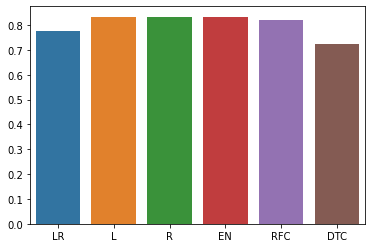

In [23]:
models = ['LR', 'L', 'R','EN', 'RFC', 'DTC']                 #X - Axis showing the ML Models
accuracy = [mla1,mla2,mla3,mla4,mla5,mla6]                   #Y - Axis showing the corresponding accuracy scores
sns.barplot(x = models, y = accuracy)                   #Bar plot comparing all the models

#Note that the Accuracy is affected by various factors such as input values ('features') considered, training-testing split, randomness etc.
#We need to work with different data and features to see what gives us the highest accuracy